# Analysis Development Notebook

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) 

%matplotlib inline

## 1. Collecting Data

In [74]:
df = pd.read_csv("./data/ramon_garmin.csv")

In [75]:
df.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Training Stress Score®,Grit,Flow,Bottom Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Runs,Max Temp
0,Treadmill Running,05-02-20 18:02,False,Treadmill Running,1.27,165,0:13:01,130,141,2.2,138,167,10:14,8:04,--,--,1.13,0,0,0,0,0,0:00,77.0,0:00,No,04:21.9,2,0
1,Treadmill Running,04-02-20 16:35,False,Treadmill Running,0.63,65,05:10.2,128,137,1.2,162,168,8:12,7:30,--,--,1.21,0,0,0,0,0,0:00,75.2,0:00,No,00:00.0,1,0
2,Treadmill Running,03-02-20 18:01,False,Treadmill Running,1.27,148,0:10:54,135,147,2.3,164,169,8:34,7:37,--,--,1.15,0,0,0,0,0,0:00,75.2,0:00,No,02:18.9,2,0
3,Running,01-02-20 14:37,False,Sydney Running,2.64,359,0:23:11,152,171,3.7,160,178,8:47,6:59,118,174,1.15,0,0,0,0,0,0:00,91.4,0:00,No,05:20.0,3,0
4,Running,23-01-20 6:36,False,Running,0.49,71,04:23.3,159,173,2.1,166,183,8:56,8:11,--,39,1.08,0,0,0,0,0,0:00,78.8,0:00,No,00:00.0,1,0


In [76]:
df.shape

(441, 29)

## 2. Preparing Data 4 Analysis

In [77]:
# Let's first have a look at our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 29 columns):
Activity Type               441 non-null object
Date                        441 non-null object
Favorite                    441 non-null bool
Title                       441 non-null object
Distance                    441 non-null float64
Calories                    441 non-null object
Time                        441 non-null object
Avg HR                      441 non-null int64
Max HR                      441 non-null int64
Aerobic TE                  441 non-null object
Avg Run Cadence             441 non-null object
Max Run Cadence             441 non-null object
Avg Pace                    441 non-null object
Best Pace                   441 non-null object
Elev Gain                   441 non-null object
Elev Loss                   441 non-null object
Avg Stride Length           441 non-null float64
Avg Vertical Ratio          441 non-null int64
Avg Vertical Oscillation    441 no

In [78]:
df.describe()

,Distance,Avg HR,Max HR,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Training Stress Score®,Grit,Flow,Min Temp,Max Temp
count,441.000000,441.000000,441.000000,441.000000,441.0,441.0,441.0,441.0,441.0,441.000000,441.0
mean,1.510998,126.108844,146.303855,0.685034,0.0,0.0,0.0,0.0,0.0,78.314286,0.0
std,1.073580,22.566809,21.539250,0.571900,0.0,0.0,0.0,0.0,0.0,5.944516,0.0
min,0.000000,70.000000,82.000000,0.000000,0.0,0.0,0.0,0.0,0.0,55.400000,0.0
25%,0.820000,104.000000,128.000000,0.000000,0.0,0.0,0.0,0.0,0.0,75.200000,0.0
50%,1.020000,133.000000,151.000000,1.050000,0.0,0.0,0.0,0.0,0.0,77.000000,0.0
75%,2.020000,146.000000,163.000000,1.160000,0.0,0.0,0.0,0.0,0.0,82.400000,0.0
max,4.690000,164.000000,190.000000,2.030000,0.0,0.0,0.0,0.0,0.0,96.800000,0.0


In [79]:
df.replace('--', np.nan, inplace=True)

In [80]:
df.tail()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Training Stress Score®,Grit,Flow,Bottom Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Runs,Max Temp
436,Running,06-10-17 11:04,False,Kansas City Running,4.44,608,0:44:14,141,162,3.5,157,169,9:58,7:58,144,138,1.03,0,0,0,0,0,0:00,80.6,0:00,No,00:00.0,NaN,0
437,Strength Training,25-09-17 19:30,False,Strength,0.00,80,0:15:46,88,107,0.2,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,0,0,0,0,0:00,73.4,0:00,No,00:00.0,NaN,0
438,Running,21-09-17 12:16,False,Kansas City Running,4.25,565,0:37:26,149,182,3.9,165,180,8:48,7:19,108,121,1.11,0,0,0,0,0,0:00,86.0,0:00,No,00:00.0,NaN,0
439,Running,19-09-17 18:45,False,Kansas City Running,4.32,553,0:36:57,148,170,4.2,165,177,8:33,7:16,98,141,1.14,0,0,0,0,0,0:00,82.4,0:00,No,00:00.0,NaN,0
440,Running,16-09-17 15:17,False,Kansas City Running,3.02,404,0:24:56,156,187,3.8,161,200,8:15,4:57,59,98,1.21,0,0,0,0,0,0:00,84.2,0:00,No,00:00.0,NaN,0


In [115]:
df['Number of Runs'].unique()

array([ 2.,  1.,  3.,  4.,  5., nan])

In [82]:
df.drop(['Avg Vertical Ratio', 'Avg Vertical Oscillation',
         'Training Stress Score®', 'Grit', 'Flow', 'Favorite',
         'Bottom Time', 'Surface Interval', 'Best Lap Time', 
         'Max Temp', 'Decompression'], axis=1, inplace=True)

In [83]:
df.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Min Temp,Number of Runs
0,Treadmill Running,05-02-20 18:02,Treadmill Running,1.27,165,0:13:01,130,141,2.2,138,167,10:14,8:04,NaN,NaN,1.13,77.0,2
1,Treadmill Running,04-02-20 16:35,Treadmill Running,0.63,65,05:10.2,128,137,1.2,162,168,8:12,7:30,NaN,NaN,1.21,75.2,1
2,Treadmill Running,03-02-20 18:01,Treadmill Running,1.27,148,0:10:54,135,147,2.3,164,169,8:34,7:37,NaN,NaN,1.15,75.2,2
3,Running,01-02-20 14:37,Sydney Running,2.64,359,0:23:11,152,171,3.7,160,178,8:47,6:59,118,174,1.15,91.4,3
4,Running,23-01-20 6:36,Running,0.49,71,04:23.3,159,173,2.1,166,183,8:56,8:11,NaN,39,1.08,78.8,1


Fix the date

Make your numerical variables numerical.

In [85]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dt.year.value_counts()

2018    224
2019    198
2017     12
2020      7
Name: Date, dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 18 columns):
Activity Type        441 non-null object
Date                 441 non-null datetime64[ns]
Title                441 non-null object
Distance             441 non-null float64
Calories             440 non-null object
Time                 441 non-null object
Avg HR               441 non-null int64
Max HR               441 non-null int64
Aerobic TE           440 non-null object
Avg Run Cadence      274 non-null object
Max Run Cadence      274 non-null object
Avg Pace             426 non-null object
Best Pace            426 non-null object
Elev Gain            272 non-null object
Elev Loss            266 non-null object
Avg Stride Length    441 non-null float64
Min Temp             441 non-null float64
Number of Runs       436 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(12)
memory usage: 62.1+ KB


In [90]:
df['Calories'] = pd.to_numeric(df['Calories'])
df['Aerobic TE'] = pd.to_numeric(df['Aerobic TE'])
df['Avg Run Cadence'] = pd.to_numeric(df['Avg Run Cadence'])
df['Max Run Cadence'] = pd.to_numeric(df['Max Run Cadence'])
df['Number of Runs'] = pd.to_numeric(df['Number of Runs'])

In [91]:
type(df['Number of Runs'].iloc[0])

numpy.float64

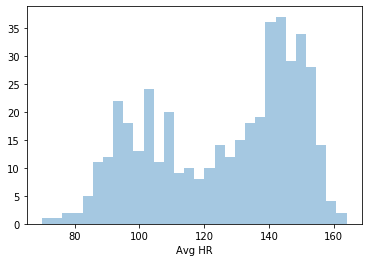

In [100]:
sns.distplot(df['Avg HR'], bins=30, kde=False)

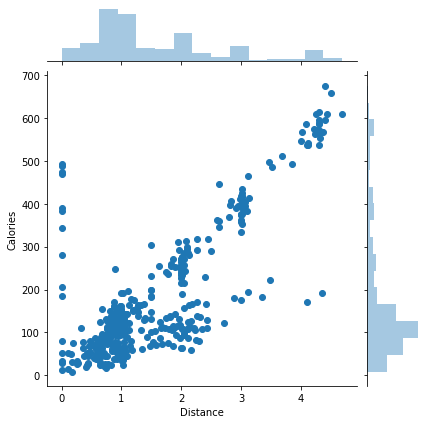

In [106]:
sns.jointplot(x='Distance', y='Calories', data=df)

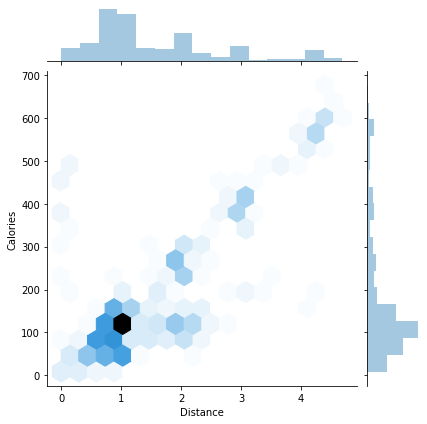

In [107]:
sns.jointplot(x='Distance', y='Calories', data=df, kind='hex')

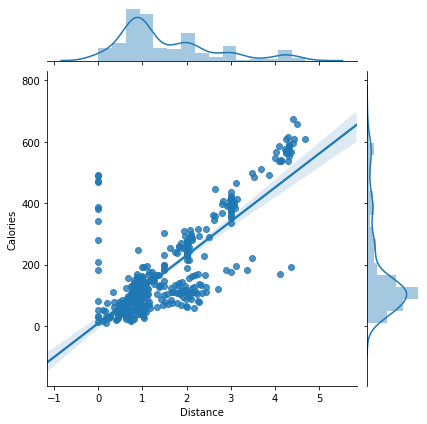

In [108]:
sns.jointplot(x='Distance', y='Calories', data=df, kind='reg')

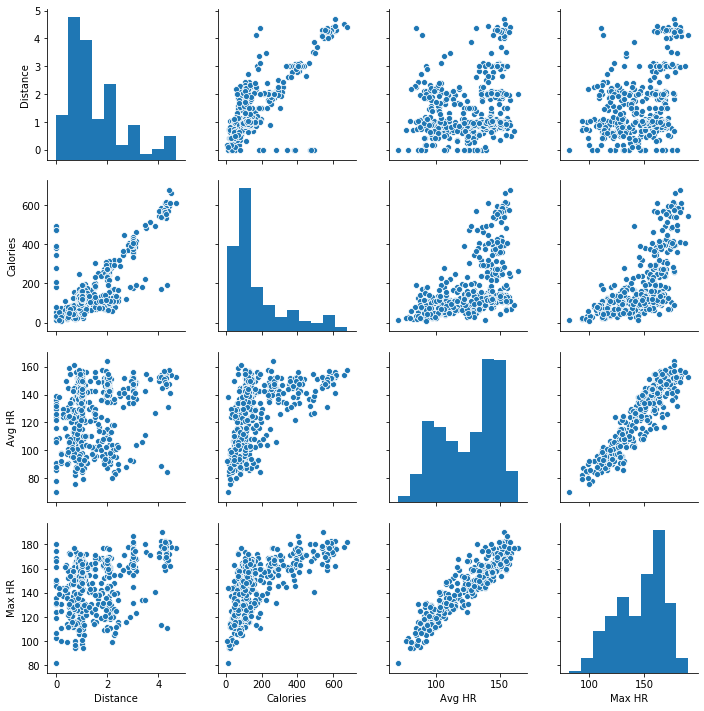

In [116]:
sns.pairplot(df[['Distance', 'Calories', 'Avg HR', 'Max HR']])